In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\laptop_prices.csv")

In [3]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
df.shape

(11768, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [6]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
category = df.select_dtypes(include= "object")
category.head(2)

,Brand,Processor,Storage,GPU,Resolution,Operating System
0,Apple,AMD Ryzen 3,512GB SSD,Nvidia GTX 1650,2560x1440,FreeDOS
1,Razer,AMD Ryzen 7,1TB SSD,Nvidia RTX 3080,1366x768,Linux


In [9]:
category.describe()

,Brand,Processor,Storage,GPU,Resolution,Operating System
count,11768,11768,11768,11768,11768,11768
unique,10,8,5,7,4,4
top,Apple,Intel i3,512GB SSD,Nvidia RTX 2060,3840x2160,Windows
freq,1262,1570,2420,1746,2977,2954


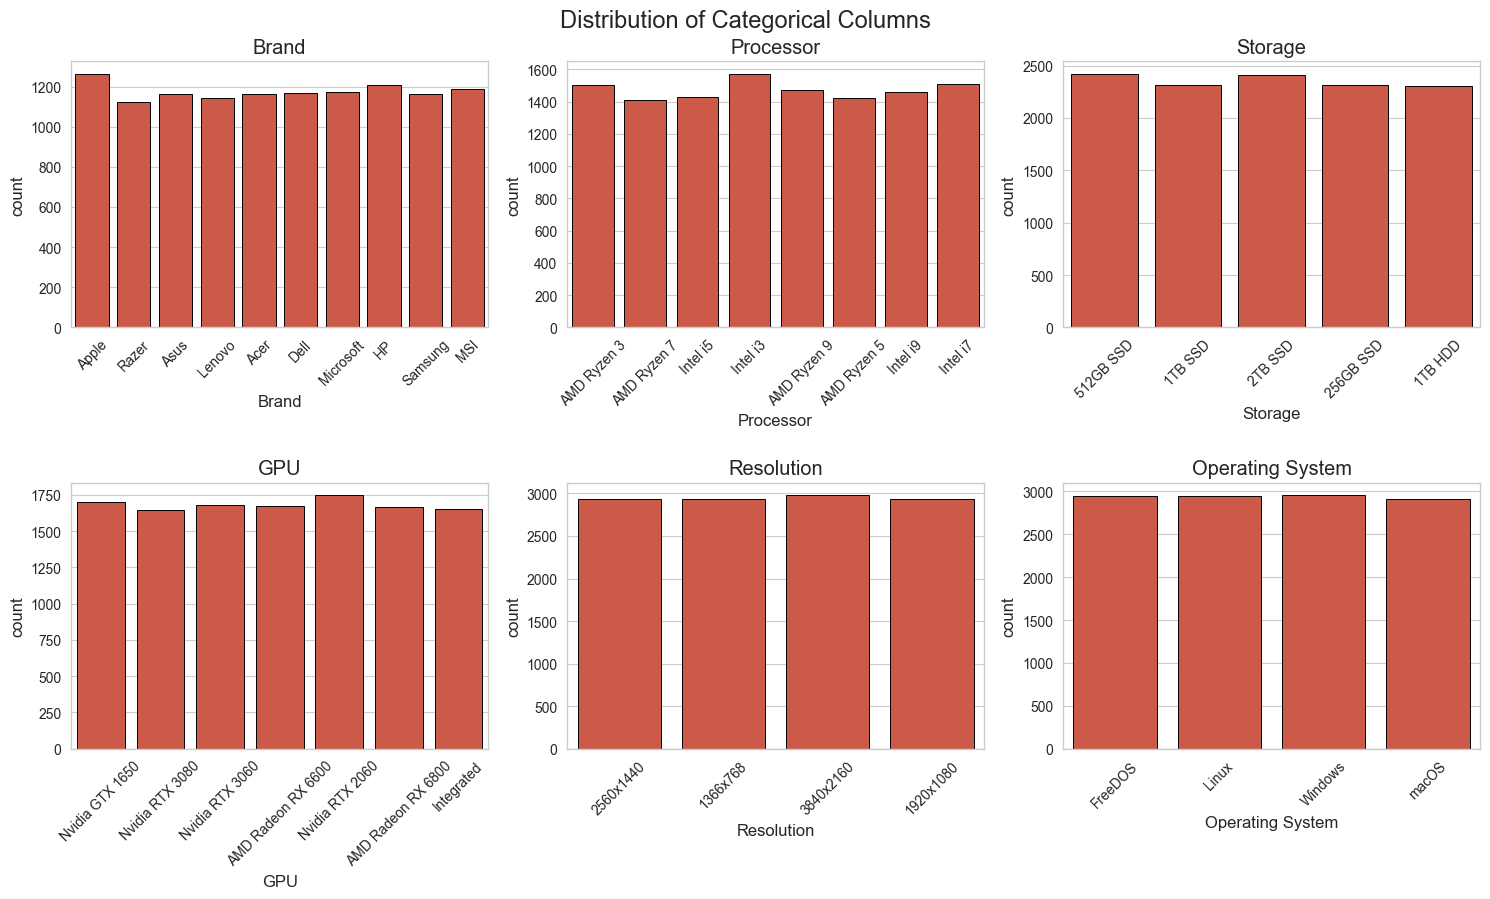

In [10]:
plt.figure( figsize = (15,12))

for index , i in enumerate(category.columns,1):
    plt.subplot(3,3,index)
    sns.countplot(x = df[i], edgecolor = "k", linewidth = 0.7)
    plt.xticks( rotation = 45)
    plt.title(i)

plt.suptitle("Distribution of Categorical Columns", size = 17)
plt.tight_layout()
plt.show()


In [11]:
numeric = df.select_dtypes(exclude= "object")
numeric.head(2)

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
0,64,17.3,8.9,1.42,3997.07
1,4,14.0,9.4,2.57,1355.78


In [12]:
numeric.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


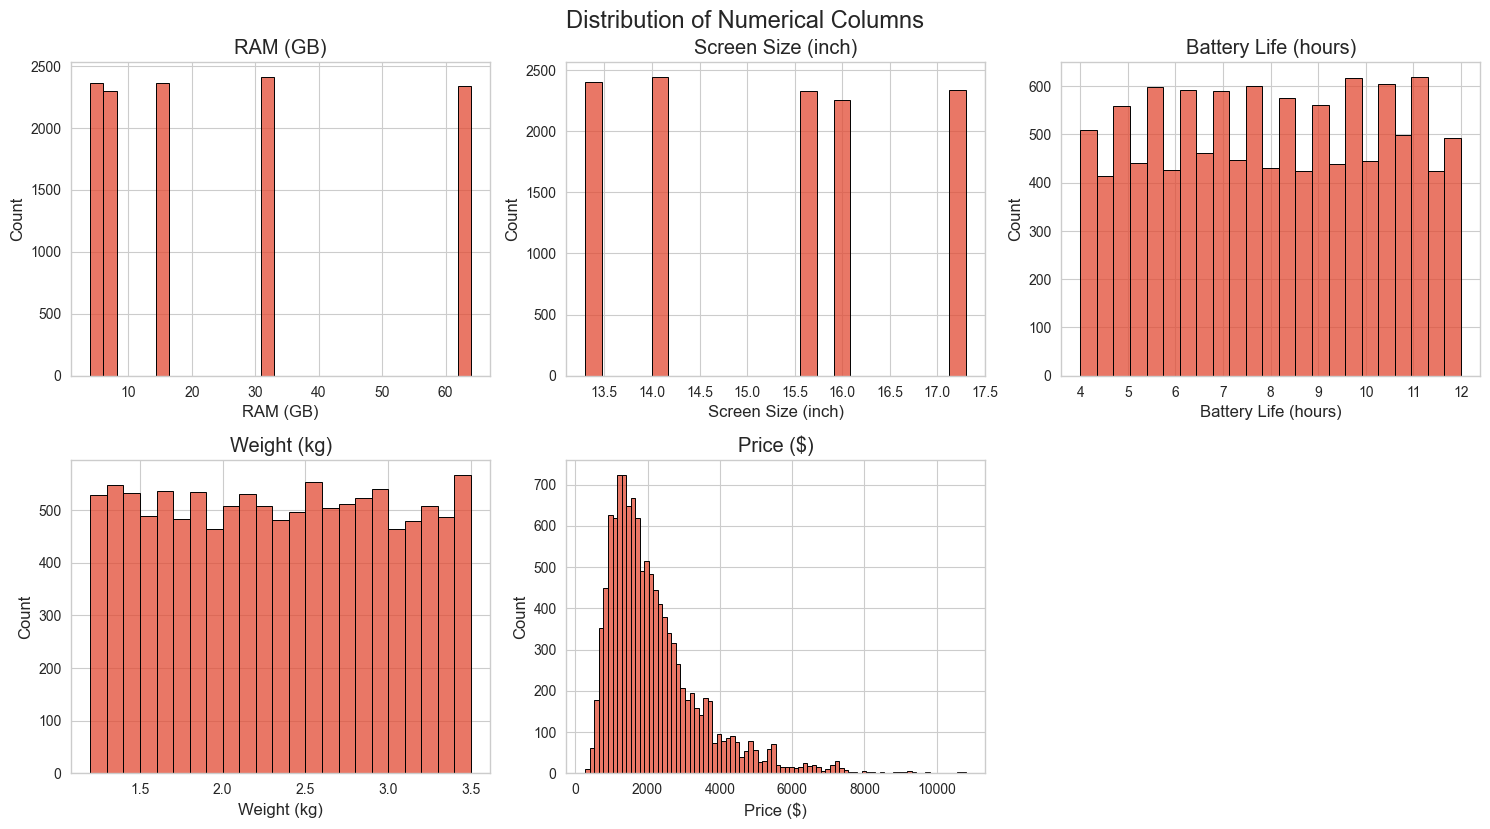

In [13]:
plt.figure( figsize = (15,12))

for index , i in enumerate(numeric.columns,1):
    plt.subplot(3,3,index)
    sns.histplot(df[i], edgecolor = "k", linewidth = 0.7)
    plt.title(i)

plt.suptitle("Distribution of Numerical Columns", size = 17)
plt.tight_layout()
plt.show()

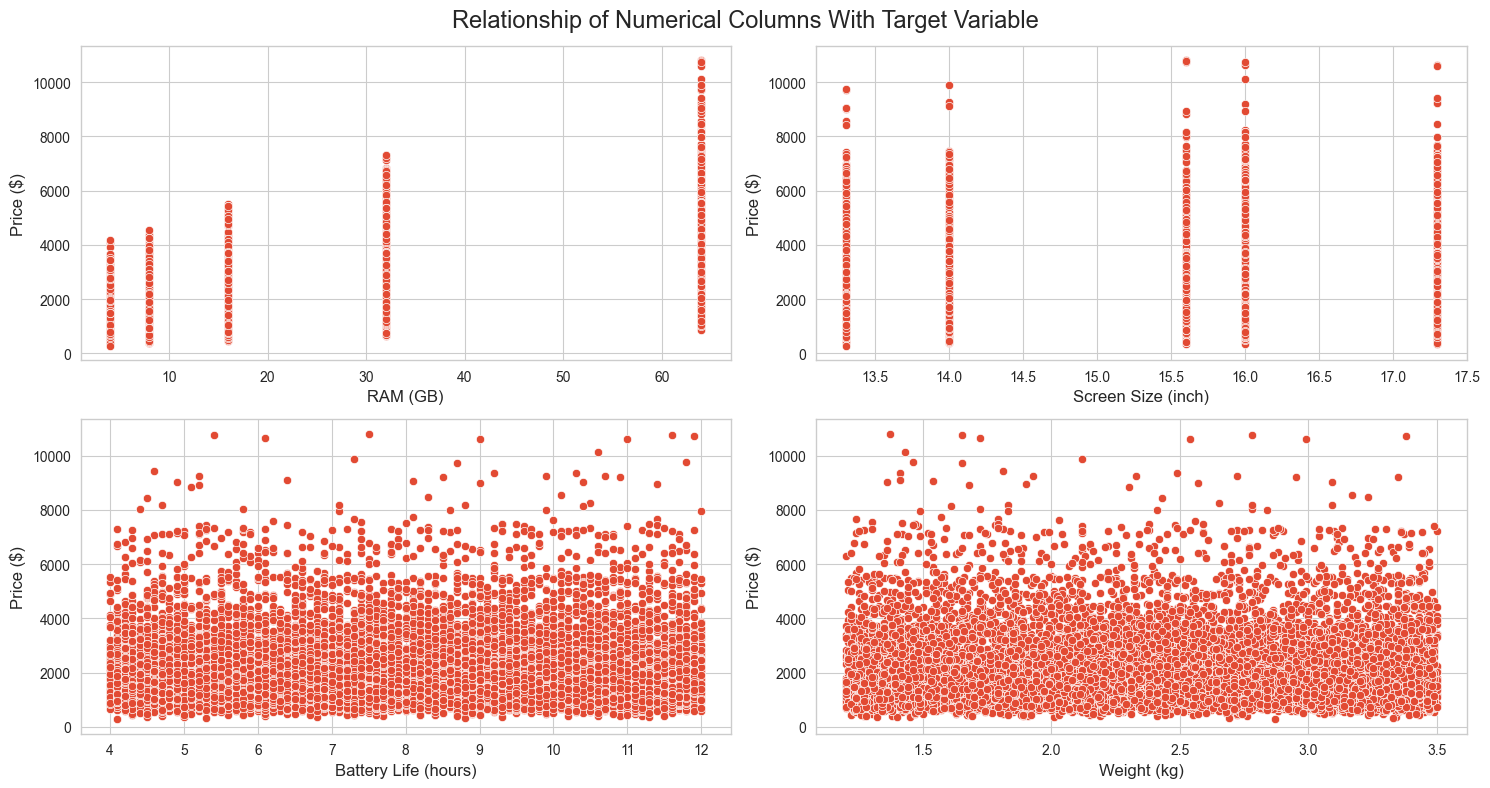

In [14]:
plt.figure( figsize = (15,8))

columns = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)']

for index ,col in enumerate(columns, 1):
    plt.subplot(2,2,index)
    sns.scatterplot(y = df["Price ($)"] , x = df[col])

plt.suptitle( "Relationship of Numerical Columns With Target Variable", size = 17)
plt.tight_layout()
plt.show()

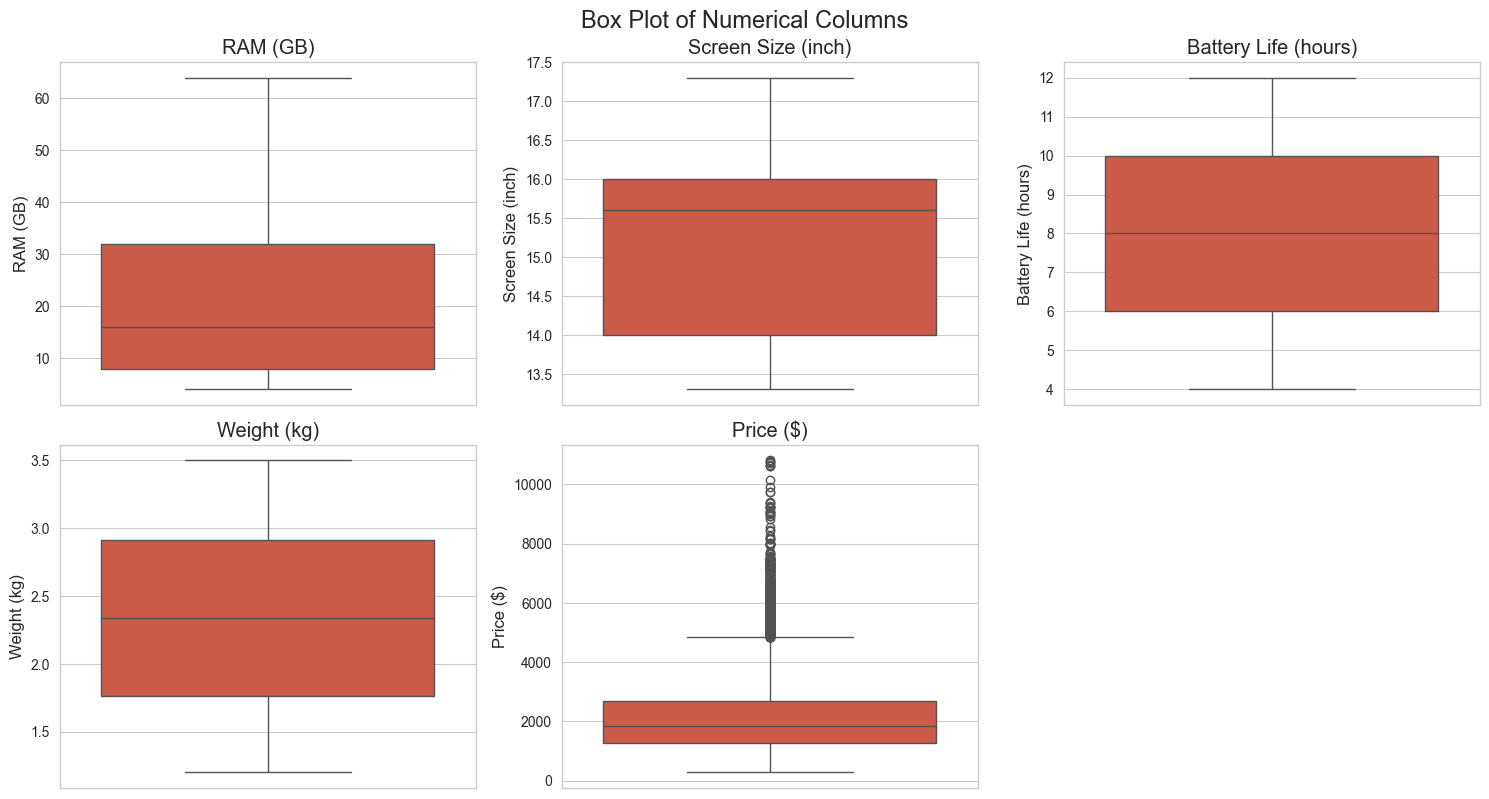

In [15]:
plt.figure( figsize = (15,12))

for index , i in enumerate(numeric.columns,1):
    plt.subplot(3,3,index)
    sns.boxplot(df[i])
    plt.title(i)

plt.suptitle("Box Plot of Numerical Columns", size = 17)
plt.tight_layout()
plt.show()

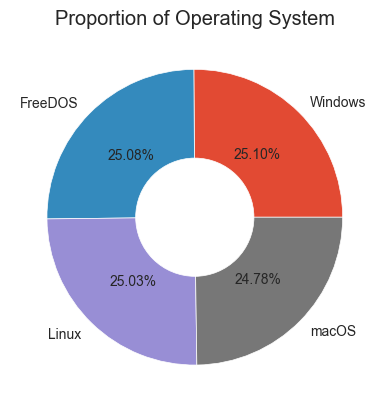

In [16]:
plt.pie( x = df["Operating System"].value_counts(), 
        labels =  df["Operating System"].value_counts().keys(),
        autopct = "%1.2f%%")

circle = plt.Circle((0,0), radius = 0.4 , fc = "white")
plt.gca().add_artist(circle)

plt.title("Proportion of Operating System")
plt.show()

In [17]:
df.head(2)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78


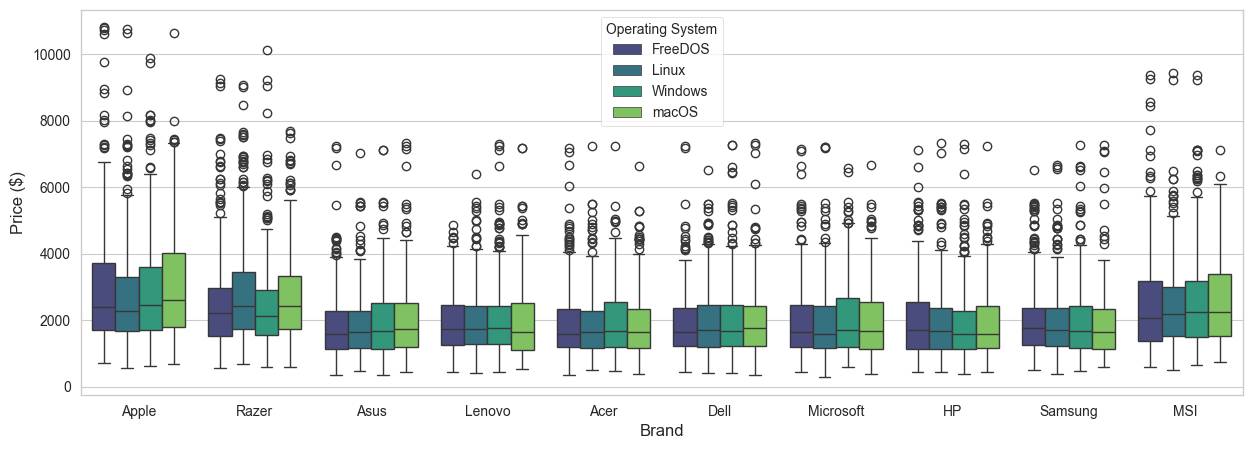

In [18]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = "Brand", y = 'Price ($)' , hue = 'Operating System', palette = "viridis")
plt.show()

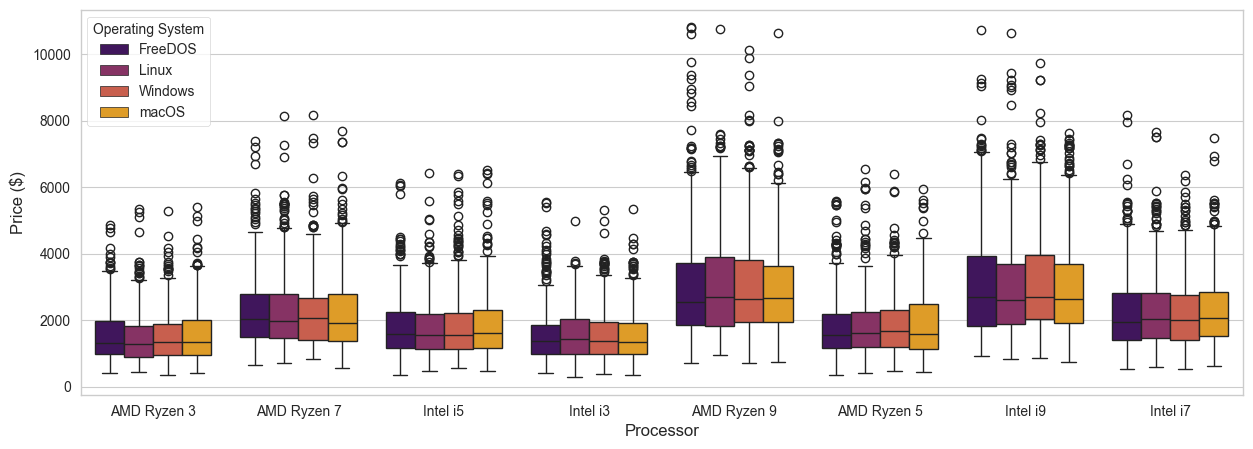

In [19]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = "Processor", y = 'Price ($)' , hue = 'Operating System', palette = "inferno")
plt.show()

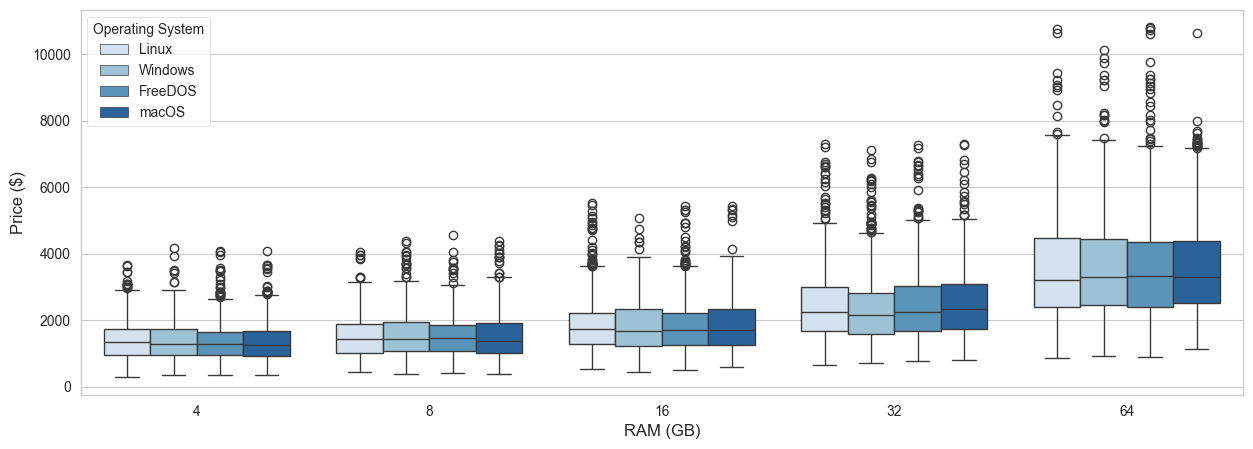

In [20]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = "RAM (GB)", y = 'Price ($)' , hue = 'Operating System', palette = "Blues")
plt.show()

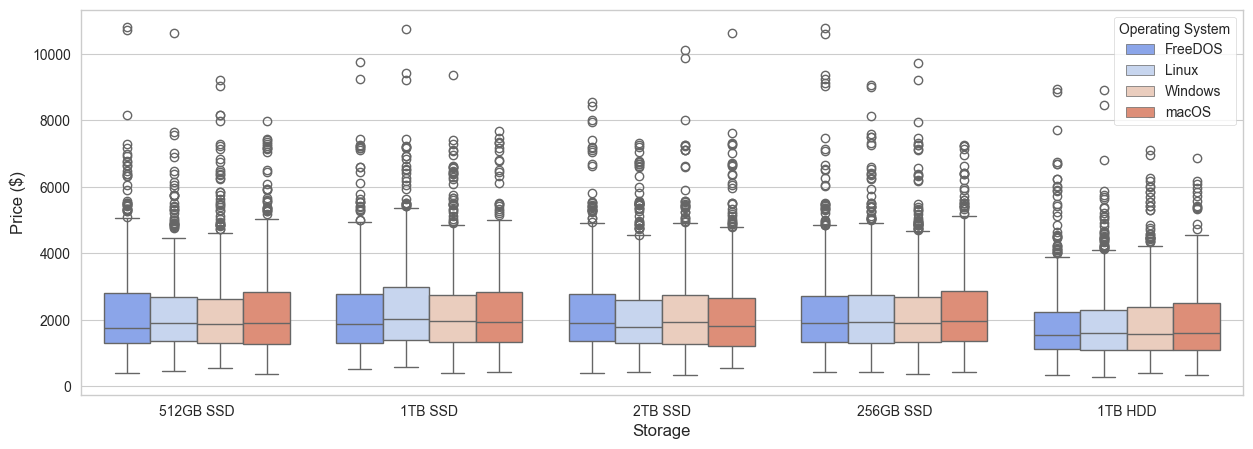

In [21]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = "Storage", y = 'Price ($)' , hue = 'Operating System', palette = "coolwarm")
plt.show()

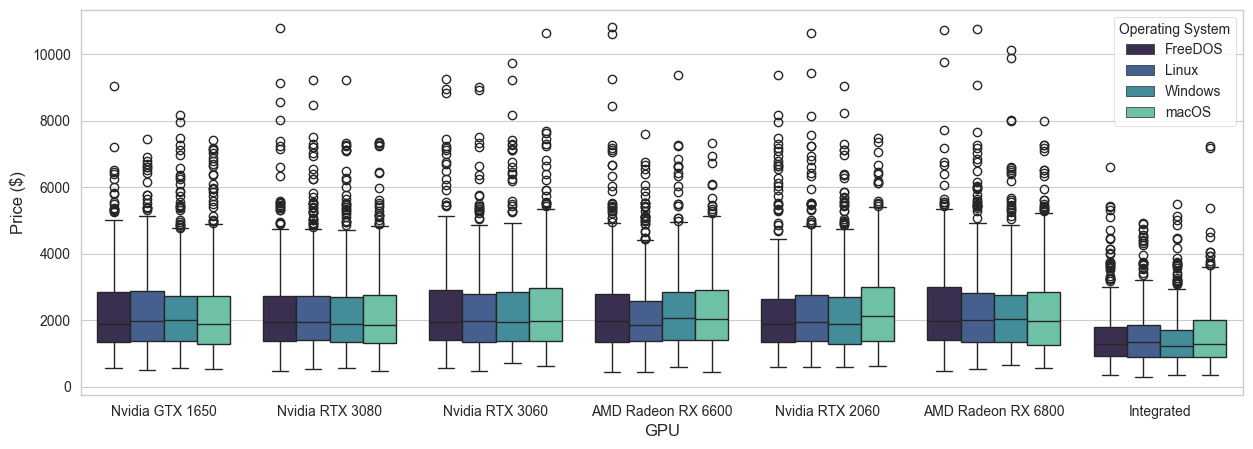

In [22]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = "GPU", y = 'Price ($)' , hue = 'Operating System', palette = "mako")
plt.show()

In [23]:
ops = df.groupby("Operating System").agg(count = ('Price ($)', 'count'), sum = ('Price ($)','sum')).reset_index()
ops

,Operating System,count,sum
0,FreeDOS,2952,6464731.81
1,Linux,2946,6418575.80
2,Windows,2954,6442717.58
3,macOS,2916,6370245.49


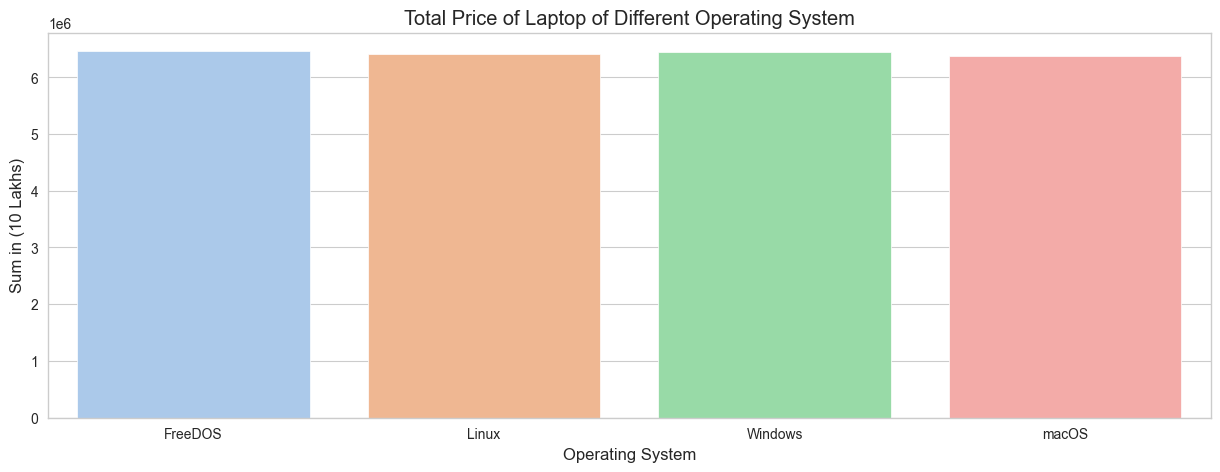

In [24]:
plt.figure( figsize = (15,5))

sns.barplot(data = ops , x = 'Operating System', y = 'sum', palette = sns.color_palette("pastel") , alpha = 1)

plt.ylabel( "Sum in (10 Lakhs)")
plt.title("Total Price of Laptop of Different Operating System")

plt.show()

In [25]:
obp = df.groupby(["Operating System", "Brand"])["Price ($)"].sum().reset_index()
fl = obp[(obp['Operating System'] == "FreeDOS") | (obp['Operating System'] == "Linux")]
fl

,Operating System,Brand,Price ($)
0,FreeDOS,Acer,573916.94
1,FreeDOS,Apple,991495.45
2,FreeDOS,Asus,541066.19
3,FreeDOS,Dell,520356.12
4,FreeDOS,HP,648242.40
5,FreeDOS,Lenovo,513507.66
6,FreeDOS,MSI,792906.58
7,FreeDOS,Microsoft,570054.71
8,FreeDOS,Razer,710756.03
9,FreeDOS,Samsung,602429.73


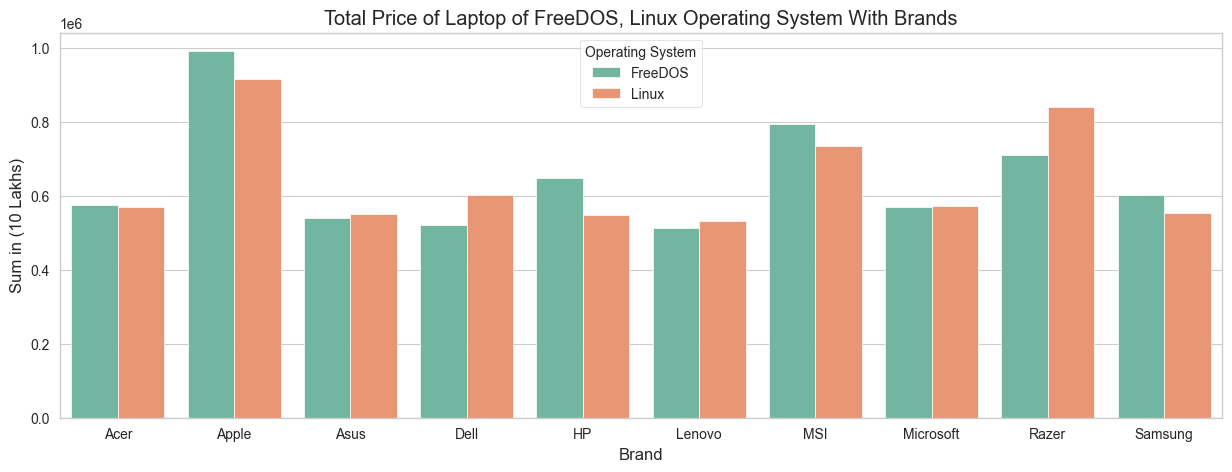

In [26]:
plt.figure( figsize = (15,5))

sns.barplot(data = fl , x = 'Brand', y = 'Price ($)', hue = "Operating System", palette = sns.color_palette("Set2") , alpha = 1)

plt.ylabel( "Sum in (10 Lakhs)")
plt.title("Total Price of Laptop of FreeDOS, Linux Operating System With Brands")

plt.show()

In [27]:
wm = obp[(obp['Operating System'] == "Windows") | (obp['Operating System'] == "macOS")]
wm

,Operating System,Brand,Price ($)
20,Windows,Acer,532950.56
21,Windows,Apple,863619.57
22,Windows,Asus,592140.56
23,Windows,Dell,596901.72
24,Windows,HP,587629.09
25,Windows,Lenovo,604830.56
26,Windows,MSI,795929.92
27,Windows,Microsoft,646793.24
28,Windows,Razer,656972.93
29,Windows,Samsung,564949.43


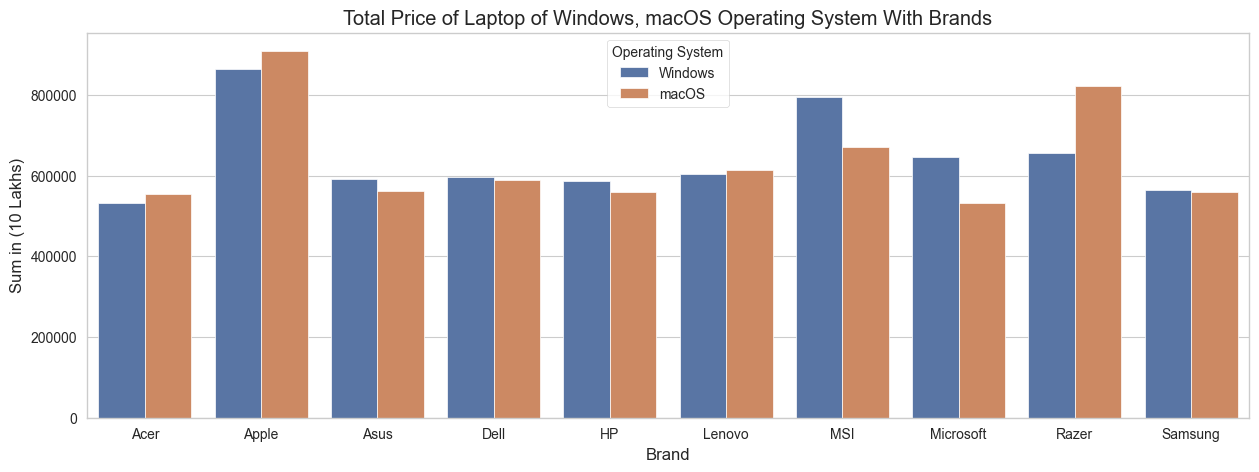

In [28]:
plt.figure( figsize = (15,5))

sns.barplot(data = wm , x = 'Brand', y = 'Price ($)', hue = "Operating System", palette = sns.color_palette("deep") , alpha = 1)

plt.ylabel( "Sum in (10 Lakhs)")
plt.title("Total Price of Laptop of Windows, macOS Operating System With Brands")

plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
le = LabelEncoder()

In [31]:
cat = category.apply(lambda x : le.fit_transform(x))

In [32]:
sc = StandardScaler()

In [33]:
new_df = pd.concat([cat,numeric], axis = 1)

In [34]:
new_df.head(2)

,Brand,Processor,Storage,GPU,Resolution,Operating System,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
0,1,0,4,3,2,0,64,17.3,8.9,1.42,3997.07
1,8,2,1,6,0,1,4,14.0,9.4,2.57,1355.78


In [35]:
corr = new_df.corr()
corr["Price ($)"].sort_values(ascending = False)

Price ($)               1.000000
RAM (GB)                0.616221
Resolution              0.415081
Processor               0.210850
Screen Size (inch)      0.069829
Storage                 0.059793
GPU                     0.038280
Battery Life (hours)    0.009778
Brand                   0.003407
Weight (kg)             0.002431
Operating System       -0.001183
Name: Price ($), dtype: float64

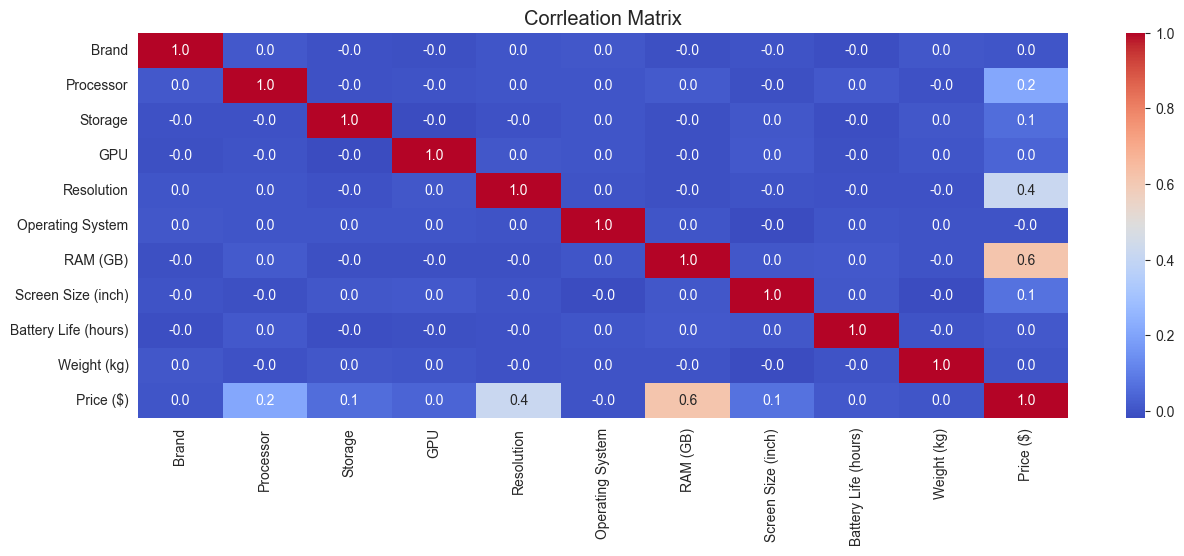

In [36]:
plt.figure(figsize = (15,5))
sns.heatmap(corr , annot = True, fmt = "1.1f", cmap = "coolwarm")
plt.title('Corrleation Matrix')
plt.show()

In [37]:
x = new_df[["RAM (GB)", "Resolution", "Processor", "Screen Size (inch)"]]
y = new_df["Price ($)"]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42)

In [39]:
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
params = { 
            "max_depth": [10, 20, 30],  # A moderate range of depth values
            "n_estimators": [100, 200, 300],  # A few selected estimators
            "min_samples_split": [2, 5, 10],  # Common values for splitting nodes
            "min_samples_leaf": [1, 2, 4],  # Reasonable leaf sizes
            "max_features": ['auto', 'sqrt', 'log2'],  # Different methods to consider features
            "bootstrap": [True, False]  # Testing with and without bootstrapping
         }

rfr = GridSearchCV( 
                           RandomForestRegressor(random_state = 42),
                           param_grid = params ,
                           cv = 5 ,
                           scoring = "neg_mean_squared_error" ,
                           n_jobs = -1 
                    )
    

In [68]:
rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [69]:
rfr.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [108]:
rfr_best = rfr.best_estimator_

In [109]:
train_pred = rfr_best.predict(x_train)

rfr_train_r2_score = r2_score(y_train, train_pred)*100

In [110]:
rfr_train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

In [111]:
print(f'Train R2score {rfr_train_r2_score}')
print(f'Train RMSE {rfr_train_rmse}')

Train R2score 84.34663069183856
Train RMSE 519.5306416590815


In [112]:
test_pred = rfr_best.predict(x_test)

rfr_test_r2_score = r2_score(y_test, test_pred)*100

In [113]:
rfr_test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [114]:
print(f'Test R2score {rfr_test_r2_score}')
print(f'Test RMSE {rfr_test_rmse}')

Test R2score 80.79943983721066
Test RMSE 583.3085464136163


In [77]:
fi = pd.DataFrame({"Columns":x.columns, "Feature_imp":rfr_best.feature_importances_*100})

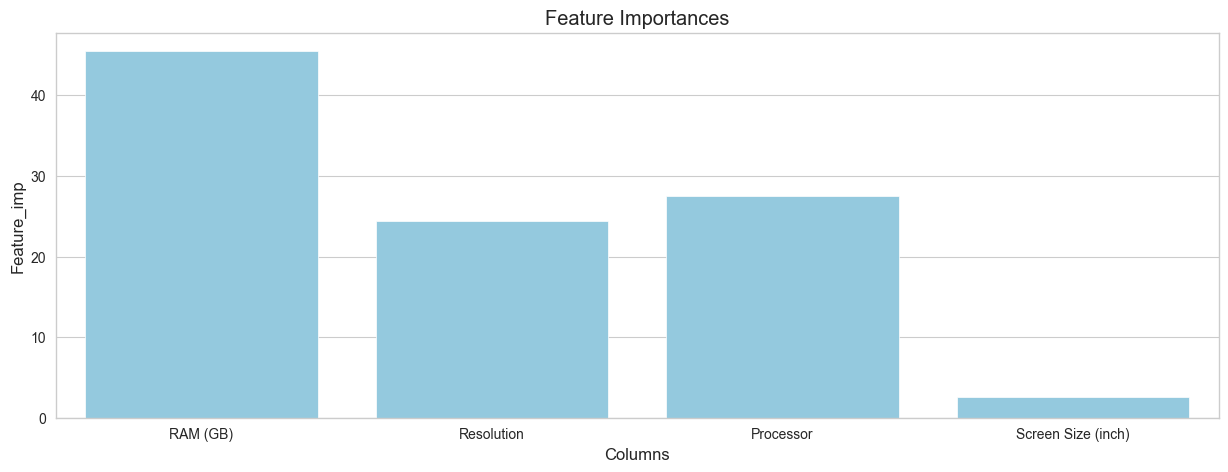

In [78]:
plt.figure(figsize = (15,5))
sns.barplot( data = fi , x = "Columns", y = "Feature_imp", color = "skyblue", alpha = 1)
plt.title("Feature Importances")
plt.show()

In [79]:
from xgboost import XGBRegressor

In [80]:
xgb = XGBRegressor(random_state = 42)

In [81]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [93]:
xgb_train_pred = xgb.predict(x_train)

xgb_train_r2_score = r2_score(y_train, xgb_train_pred)*100

In [95]:
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))

In [96]:
print(f'Train R2 score of XGb {xgb_train_r2_score}')
print(f'Train RMSE of XGb {xgb_train_rmse}')

Train R2 score of XGb 84.46399596579182
Train RMSE of XGb 517.579317980763


In [103]:
xgb_test_pred = xgb.predict(x_test)

xgb_test_r2_score = r2_score(y_test, xgb_test_pred)*100

In [104]:
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

In [105]:
print(f'Test R2 score of XGb {xgb_test_r2_score}')
print(f'Test RMSE of XGb {xgb_test_rmse}')

Test R2 score of XGb 80.84890959473873
Test RMSE of XGb 582.5566219159227


In [118]:
params = {
          "n_neighbors": [2,4,5,6,7,8] ,
          "weights" : ['uniform', 'distance']
         }

knn = GridSearchCV( 
                    KNeighborsRegressor(),
                    param_grid = params,
                    scoring= "neg_mean_squared_error",
                    n_jobs = -1,
                    cv = 3
                    )

In [119]:
knn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [121]:
knn_best = knn.best_estimator_

In [128]:
knn_train_pred = knn_best.predict(x_train)
knn_train_r2_score = r2_score(y_train , knn_train_pred)*100

In [127]:
knn_train_rmse = np.sqrt(mean_squared_error(y_train , knn_train_pred))

In [130]:
print(f'Train R2 score of knn = {knn_train_r2_score}')
print(f'Train RMSE of knn = {knn_train_rmse}')

Train R2 score of knn = 83.7435424506516
Train RMSE of knn = 529.4442163807475


In [131]:
knn_test_pred = knn_best.predict(x_test)
knn_test_r2_score = r2_score(y_test , knn_test_pred)*100

In [132]:
knn_test_rmse = np.sqrt(mean_squared_error(y_test , knn_test_pred))

In [133]:
print(f'Test R2 score of knn = {knn_test_r2_score}')
print(f'Test RMSE of knn = {knn_test_rmse}')

Test R2 score of knn = 80.10033692724654
Test RMSE of knn = 593.8328953900985


In [107]:
fi

,Columns,Feature_imp
0,RAM (GB),45.487426
1,Resolution,24.381655
2,Processor,27.502968
3,Screen Size (inch),2.627951


In [134]:
models = pd.DataFrame({"Model":["Random Forest", "XGBoost", "KNN"],
                       "Train R2": [rfr_train_r2_score, xgb_train_r2_score, knn_train_r2_score],
                       "Test R2": [rfr_test_r2_score, xgb_test_r2_score, knn_test_r2_score],
                       "Train RMSE": [rfr_train_rmse, xgb_train_rmse , knn_train_rmse],
                       "Test RMSE": [rfr_test_rmse, xgb_test_rmse, knn_test_rmse ]})
models

,Model,Train R2,Test R2,Train RMSE,Test RMSE
0,Random Forest,84.346631,80.799440,519.530642,583.308546
1,XGBoost,84.463996,80.848910,517.579318,582.556622
2,KNN,83.743542,80.100337,529.444216,593.832895
